<a href="https://colab.research.google.com/github/Jan2309jr/csat-prediction/blob/main/csat_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Know Your Data

##Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

##Dataset Loading

In [30]:
df=pd.read_csv("https://raw.githubusercontent.com/Jan2309jr/csat-prediction/refs/heads/main/Customer_support_data.csv")

## Dataset First View

In [31]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


In [32]:
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


##Dataset Rows & Columns count

In [33]:
rows,cols=df.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 85907
Columns: 20


##Dataset Information

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

###Duplicate Values

In [35]:
print(df.duplicated().sum())

0


###Missing Values/Null Values


In [36]:
# Missing Values/Null Values Count
print("Total missing values in dataset:",df.isnull().sum().sum(),"\n")
#row wise count
print("Row wise missing values count:\n")
missing_vals=df.isnull().sum()
missing_vals

Total missing values in dataset: 435995 

Row wise missing values count:



,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


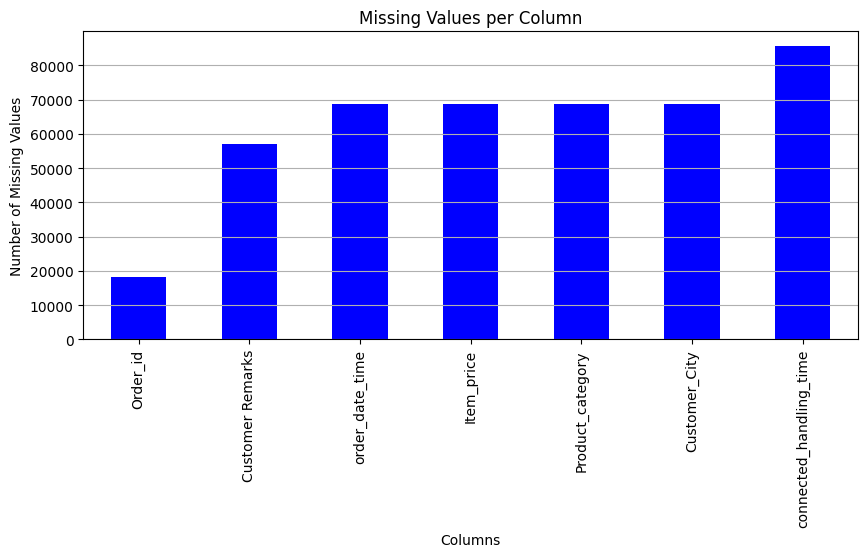

In [37]:
# Visualizing the missing values

# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=True)
# Plot
plt.figure(figsize=(10, 4))
missing_values.plot(kind='bar', color='blue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.grid(axis='y')
plt.show()


##What did you know about your dataset?

# 2. Understanding Your Variables

In [38]:
# Dataset columns
dataset_cols=pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique values": df.nunique(),
    "Missing Values":df.isnull().sum()
})
dataset_cols


,Data Type,Unique values,Missing Values
Unique id,object,85907,0
channel_name,object,3,0
category,object,12,0
Sub-category,object,57,0
Customer Remarks,object,18231,57165
Order_id,object,67675,18232
order_date_time,object,13766,68693
Issue_reported at,object,30923,0
issue_responded,object,30262,0
Survey_response_Date,object,31,0


##Variables Description

In [39]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


##Check Unique Values for each variable.


In [40]:
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


#3. Data Wrangling

##Removing irrelevant columns

In [41]:
df.drop(columns=["Unique id","Order_id"],inplace=True)
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,NaN,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,NaN,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,NaN,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


##Handling Missing Values

###Removing columns with too many missing values

In [42]:
df.isnull().sum()

,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Customer_City,68828
Product_category,68711


In [43]:
df.drop(columns=["connected_handling_time","Item_price","Product_category","Customer_City","order_date_time","Customer Remarks"],inplace=True)

In [44]:
df.isnull().sum()

,0
channel_name,0
category,0
Sub-category,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Agent_name,0
Supervisor,0
Manager,0
Tenure Bucket,0


## Data Cleaning

In [45]:
datetime_cols=["Issue_reported at","issue_responded"]
for col in datetime_cols:
  df[col]=pd.to_datetime(df[col],format="%d/%m/%Y %H:%M")
df["Survey_response_Date"]=pd.to_datetime(df["Survey_response_Date"],format="%d-%b-%y")

In [46]:
#removing columns with missing data
# Filter to keep only rows where time is not exactly 00:00:00
df = df[df['issue_responded'].dt.time != pd.to_datetime('00:00:00').time()]
df = df[df['Issue_reported at'].dt.time != pd.to_datetime('00:00:00').time()]

In [47]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [48]:
#adding columns
df["Responds Time"]=(df["issue_responded"]-df["Issue_reported at"]).dt.total_seconds()/60
df['Response Day'] = df['Survey_response_Date'].dt.day_name()

In [49]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Responds Time,Response Day
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0,Tuesday
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0,Tuesday
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0,Tuesday
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0,Tuesday
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0,Tuesday


In [50]:
df.nunique()

,0
channel_name,3
category,12
Sub-category,57
Issue_reported at,30101
issue_responded,30236
Survey_response_Date,31
Agent_name,1371
Supervisor,40
Manager,6
Tenure Bucket,5


##Data Encoding

In [51]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Responds Time,Response Day
0,2,8,19,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,1072,26,1,4,2,5,34.0,5
1,2,8,34,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,1323,9,3,3,2,5,2.0,5
2,1,5,15,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,370,18,5,4,1,5,22.0,5
3,1,10,40,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,1024,33,2,3,1,5,20.0,5
4,1,1,22,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,247,4,3,0,2,5,2.0,5


##Clean Column Names

In [53]:
df.columns=df.columns.str.replace("_"," ").str.replace("-"," ").str.title()

##Identifying Outliers

/tmp/ipython-input-54-955567170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Csat Score', y='Responds Time', data=df, palette='Set2')


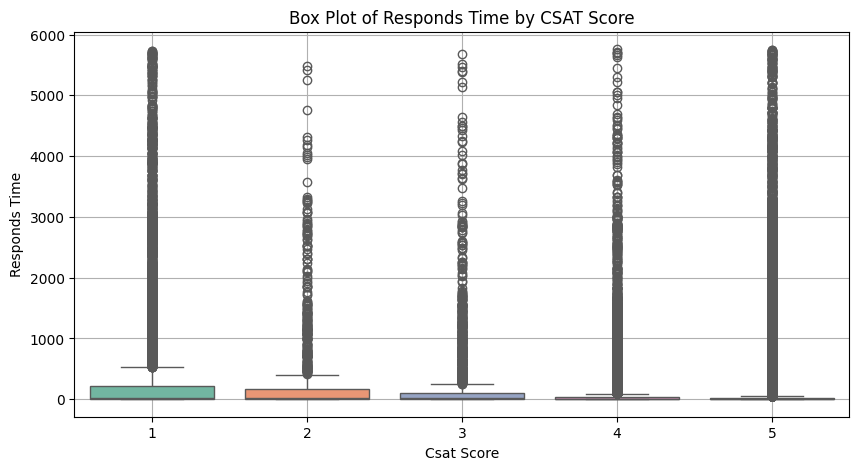

In [54]:
plt.figure(figsize=(10, 5))
sb.boxplot(x='Csat Score', y='Responds Time', data=df, palette='Set2')
plt.title('Box Plot of Responds Time by CSAT Score')
plt.grid(True)
plt.show()

In [55]:
#IQR (Interquartile Range)
Q1 = df['Responds Time'].quantile(0.25)
Q3 = df['Responds Time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Responds Time'] = df['Responds Time'].clip(lower=lower_bound, upper=upper_bound)
#Log Transform
df['Responds Time'] = np.log1p(df['Responds Time'])

###CSAT Distribution

/tmp/ipython-input-56-2536268904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=csat_dist.index, y=csat_dist.values, palette="viridis")


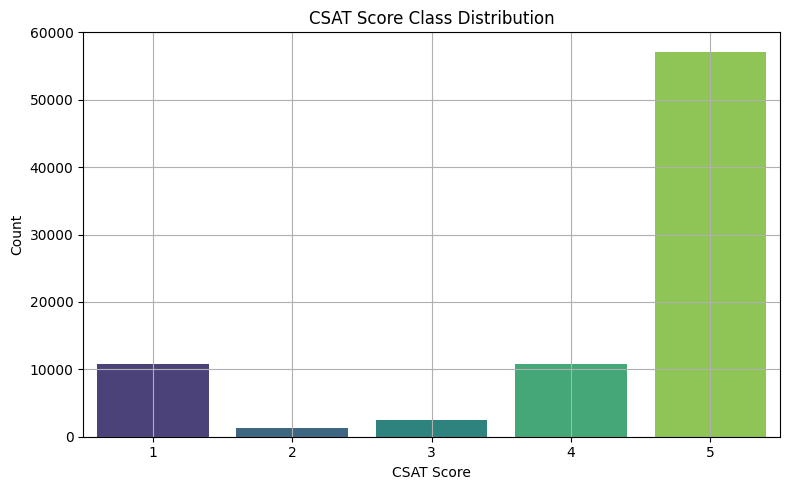

,count
Csat Score,
1,10853
2,1235
3,2468
4,10740
5,57150


In [56]:
csat_dist = df["Csat Score"].value_counts().sort_index()
# Plot the class distribution
plt.figure(figsize=(8, 5))
sb.barplot(x=csat_dist.index, y=csat_dist.values, palette="viridis")
plt.title("CSAT Score Class Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

csat_dist

##What all manipulations have you done and insights you found?

#4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

###Chart - 1

/tmp/ipython-input-57-533638923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=csat_dist.index, y=csat_dist.values, palette="viridis")


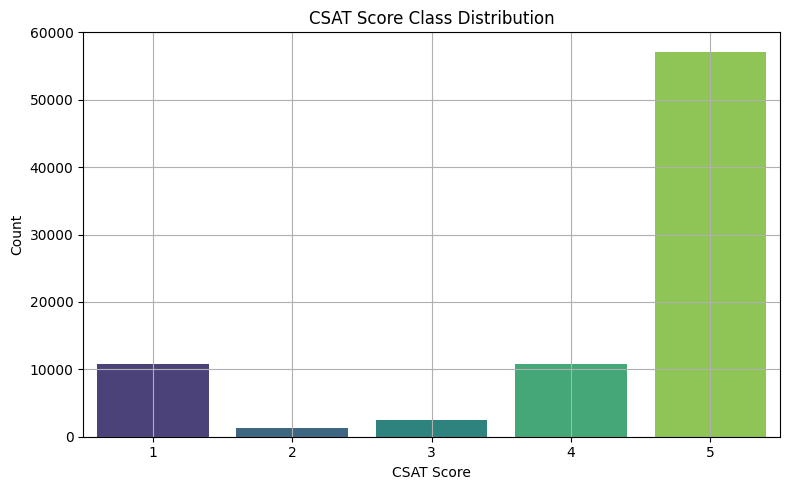

,count
Csat Score,
1,10853
2,1235
3,2468
4,10740
5,57150


In [57]:
## Chart - 1 CSAT distribution as bar plot
csat_dist = df["Csat Score"].value_counts().sort_index()
# Plot the class distribution
plt.figure(figsize=(8, 5))
sb.barplot(x=csat_dist.index, y=csat_dist.values, palette="viridis")
plt.title("CSAT Score Class Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

csat_dist

####1. Why did you pick the specific chart?

####2. What are the insights found from the chart?

####3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason

###Chart - 2

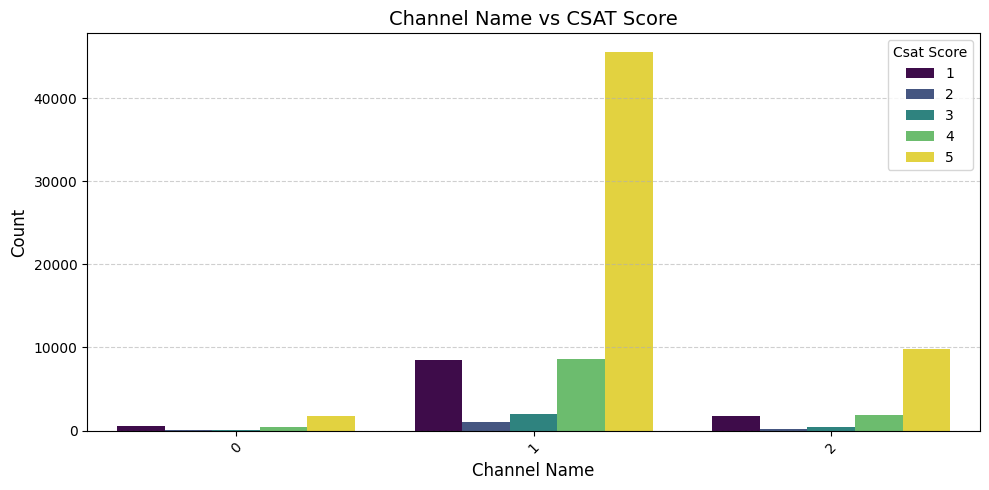

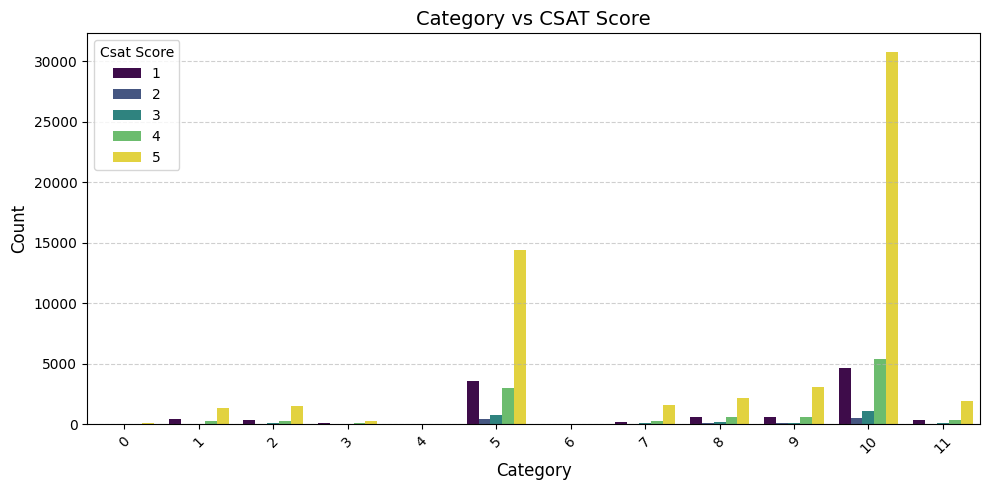

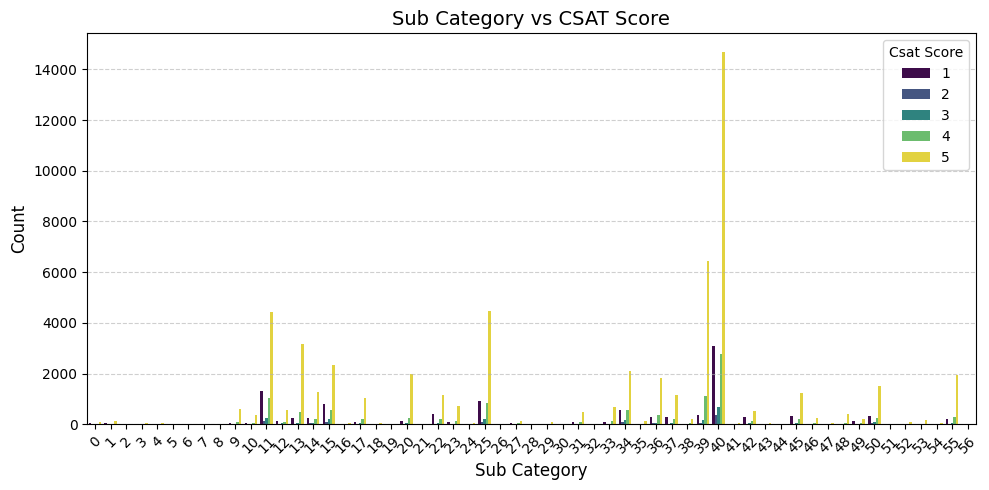

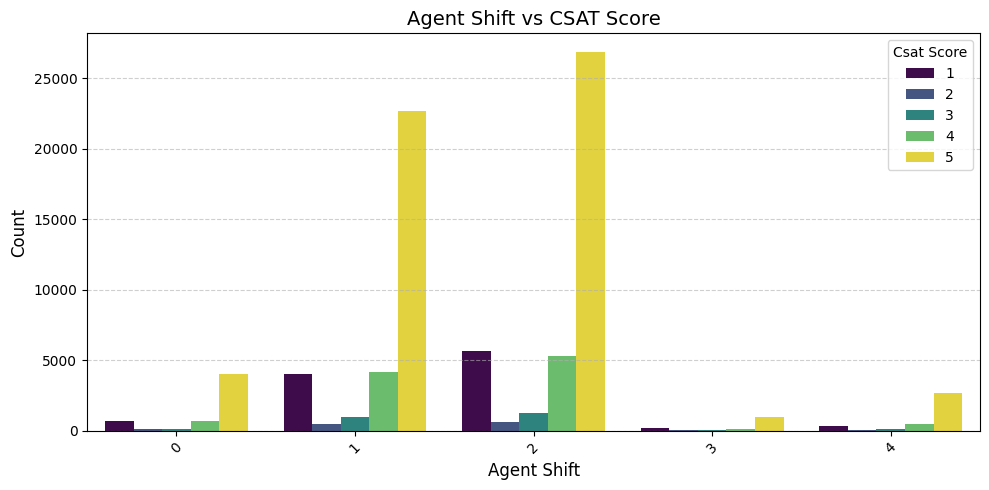

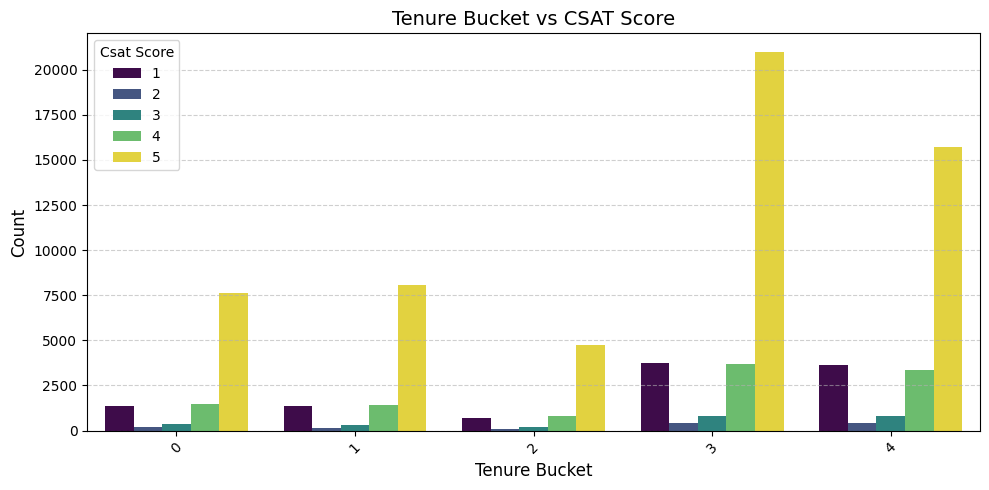

In [58]:
categorical_cols = ['Channel Name', 'Category', 'Sub Category', 'Agent Shift', 'Tenure Bucket']

# Plotting each categorical feature with CSAT as hue
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sb.countplot(data=df, x=col, hue='Csat Score', palette='viridis')

    plt.title(f'{col} vs CSAT Score', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Csat Score')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Chart - 3

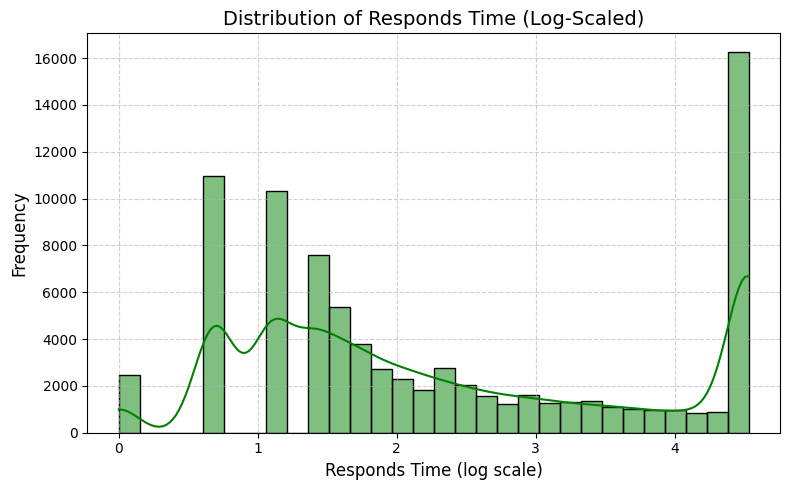

In [59]:
plt.figure(figsize=(8, 5))
sb.histplot(df['Responds Time'], kde=True, color='green', bins=30)

plt.title('Distribution of Responds Time (Log-Scaled)', fontsize=14)
plt.xlabel('Responds Time (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Chart - 4

In [60]:
# Ensure datetime conversion
df['Issue Reported At'] = pd.to_datetime(df['Issue Reported At'])

# Extract hour and weekday
df['issue_hour'] = df['Issue Reported At'].dt.hour
df['issue_weekday'] = df['Issue Reported At'].dt.dayofweek  # 0=Mon, 6=Sun

# Optional: Map weekday names
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['weekday_name'] = df['issue_weekday'].map(weekday_map)

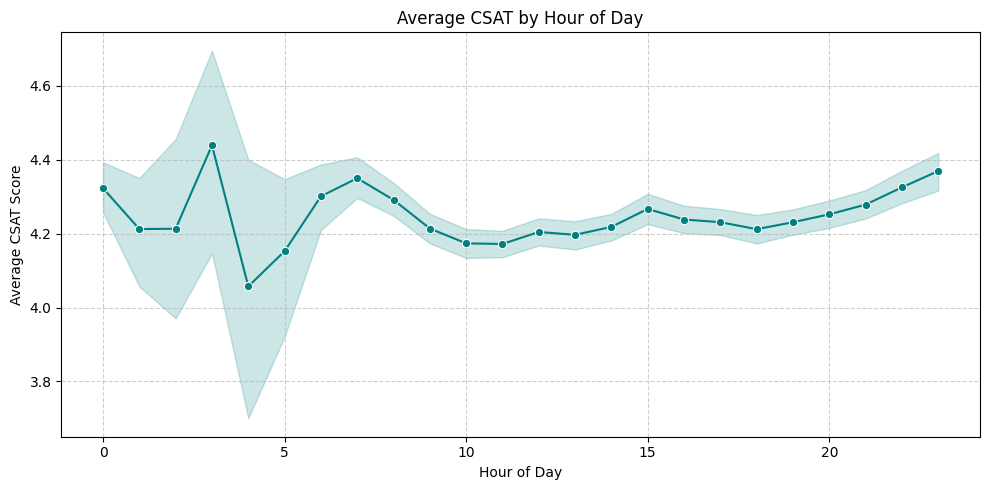

In [61]:
# Average CSAT per hour
plt.figure(figsize=(10, 5))
sb.lineplot(data=df, x='issue_hour', y='Csat Score', marker='o', color='teal')
plt.title('Average CSAT by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average CSAT Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Chart - 5

/tmp/ipython-input-62-1263624170.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df, x='shift_label', y='Responds Time', palette='Pastel1')


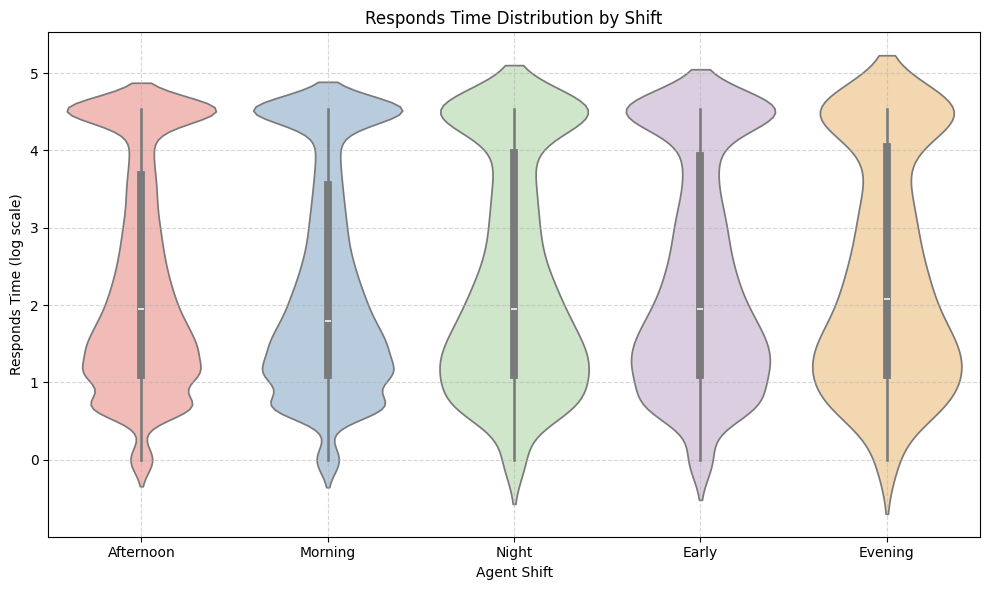

In [62]:
shift_labels = {
    0: 'Early',
    1: 'Morning',
    2: 'Afternoon',
    3: 'Evening',
    4: 'Night'
}
df['shift_label'] = df['Agent Shift'].map(shift_labels)

# Plot violin chart
plt.figure(figsize=(10, 6))
sb.violinplot(data=df, x='shift_label', y='Responds Time', palette='Pastel1')

plt.title('Responds Time Distribution by Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Responds Time (log scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Chart - 6

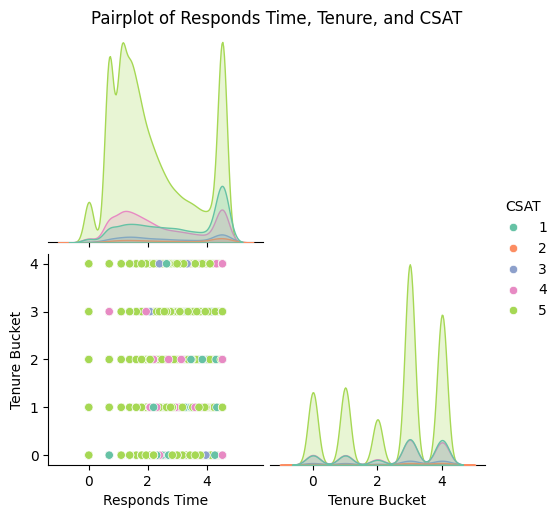

In [63]:
pair_df = df[['Responds Time', 'Tenure Bucket', 'Csat Score']].copy()
pair_df.rename(columns={'Csat Score': 'CSAT'}, inplace=True)

# Plot pairplot with hue as CSAT
sb.pairplot(pair_df, hue='CSAT', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Responds Time, Tenure, and CSAT', y=1.02)
plt.show()

### Chart - 7

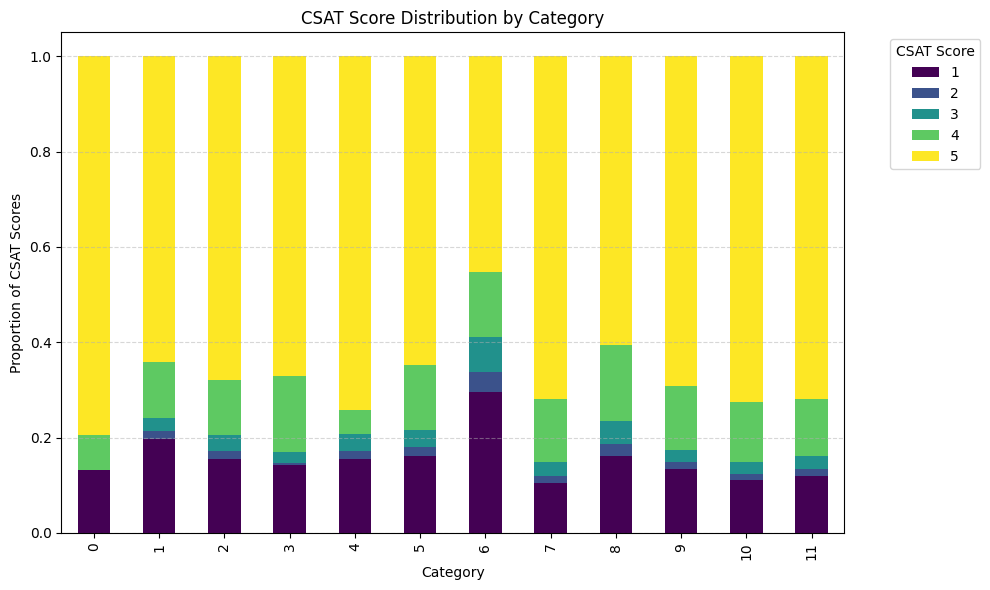

In [64]:
csat_by_category = pd.crosstab(df['Category'], df['Csat Score'], normalize='index')

# Step 2: Plot the stacked bar chart
csat_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Step 3: Styling
plt.title('CSAT Score Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of CSAT Scores')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Chart - 8

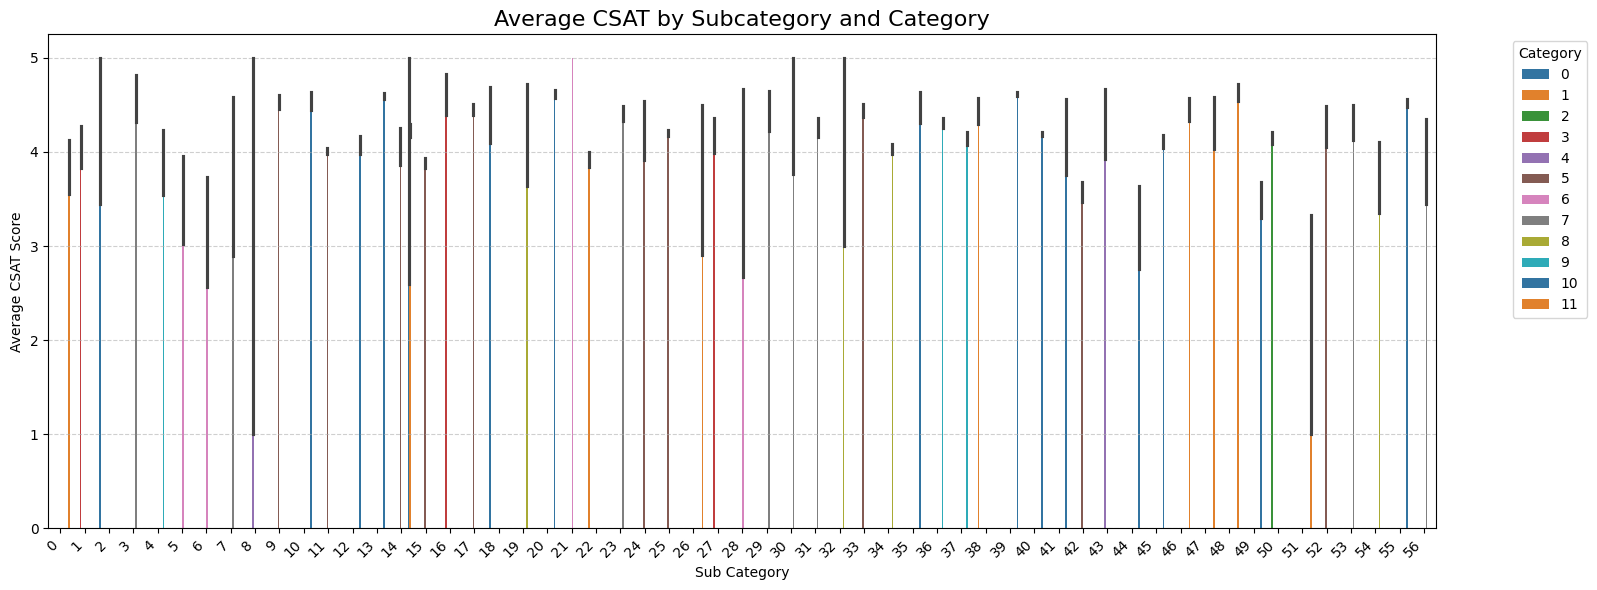

In [65]:
plt.figure(figsize=(16, 6))
sb.barplot(
    data=df,
    x='Sub Category',      # X-axis is subcategory
    y='Csat Score',         # Y-axis is average CSAT
    hue='Category',         # Grouped by Category
    palette='tab10'
)

# Styling
plt.title('Average CSAT by Subcategory and Category', fontsize=16)
plt.xlabel('Sub Category')
plt.ylabel('Average CSAT Score')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#7. ML Model Implementation